# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
import os

# Load pickled data
import pickle
import pandas as pd
import time as time
import random

from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

import scipy.ndimage as snd

# Importing a few others I want
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# TODO: Fill this in based on where you saved the training and testing data

def onehot_encode_labels(Y,N_classes):
    onehotE = OneHotEncoder()
    Y_ohe = onehotE.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohe.transform(Y.reshape(-1, 1)).toarray()
    return Y_labels

def check_onehot(cls,y):
    check = np.linalg.norm(np.argmax(cls,axis=1)-y)
    if check == 0:
        print('One hot encoding correct')
    else:
        print('One hot encoding doesnt match the output')

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

val_image_shape = X_valid[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Validation data shape =", val_image_shape)
print("Number of classes =", n_classes)

#onehot_y_train = onehot_encode_labels(y_train, 43)
#onehot_y_valid = onehot_encode_labels(y_valid, 43)
#onehot_y_test = onehot_encode_labels(y_test, 43)

#check_onehot(onehot_y_train, y_train)
#check_onehot(onehot_y_valid, y_valid)
#check_onehot(onehot_y_test, y_test)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Validation data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

    ClassId                                           SignName  Total
0         2                               Speed limit (50km/h)   2010
1         1                               Speed limit (30km/h)   1980
2        13                                              Yield   1920
3        12                                      Priority road   1890
4        38                                         Keep right   1860
5        10       No passing for vehicles over 3.5 metric tons   1800
6         4                               Speed limit (70km/h)   1770
7         5                               Speed limit (80km/h)   1650
8        25                                          Road work   1350
9         9                                         No passing   1320
10        7                              Speed limit (100km/h)   1290
11        3                               Speed limit (60km/h)   1260
12        8                              Speed limit (120km/h)   1260
13       11         

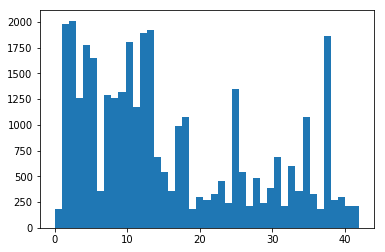

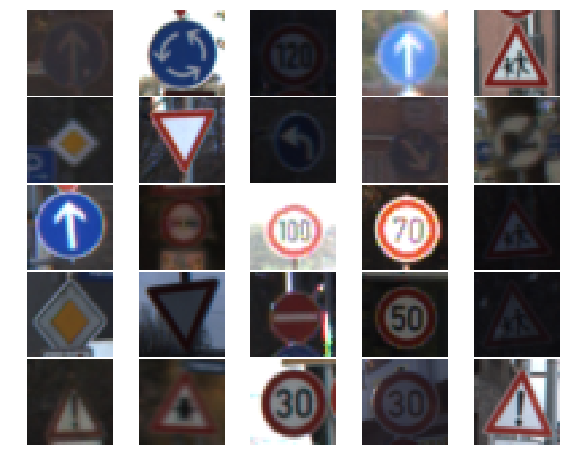

In [3]:
#calculate no of occurences of unique images and sort it 
data_sum = [[i,sum(y_train == i)] for i in range(len(np.unique(y_train)))] 
data_sum_sorted = sorted(data_sum, key=lambda x: x[1])
#print(data_sum_sorted)

#read sign names 
signname_df = pd.read_csv('signnames.csv', index_col='ClassId')
#print(signname_df)
signname_df['Total'] = pd.Series(np.asarray(data_sum_sorted).T[1], index=np.asarray(data_sum_sorted).T[0])
#print(signname_df)

signname_df_sorted = signname_df.sort_values(['Total'],ascending=[0]).reset_index()
print (signname_df_sorted)
#plot train data distribution as histogram graph 
plt.hist(y_train, bins = n_classes)
#signname_df_sorted.head(43)

def plot_random_images(rows, cols, X, Y, is_gray): 
    plt.figure(figsize = (10,8)) 
    gs1 = gridspec.GridSpec(rows,rows) 
    gs1.update(wspace=0.01, hspace=0.02)
    for i in range(rows*cols):
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_aspect('equal')
        ind_plot = np.random.randint(1,len(Y))
        if is_gray :
            plt.imshow(X[ind_plot], cmap='gray')
        else :
            plt.imshow(X[ind_plot])
        plt.axis('off')
    plt.show()

print("Train dataset")
plot_random_images(5, 5, X_train, y_train, False)
print()
#print("Validation dataset")
#plot_random_images(5, 5, X_valid, y_valid)
#print()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
#pre process image. Convert to grayscale and equalize histogram
def preprocess_image(img):
    img2=img.copy() 
    #img2[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    #img2[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    #img2[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    #convert to gray color
    img = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
    img = cv2.equalizeHist(img)
    #normalize 
    #img = (img -128)/128    
    return img

def augment(image):
    if (random.choice([True, False])):
        image = snd.interpolation.shift(image, [random.randrange(-2, 2), random.randrange(-2, 2), 0])
    else:
        image = snd.interpolation.rotate(image, random.randrange(-10, 10), reshape=False)
    return image
    '''
    #Rotation
    ang_rot = np.random.uniform(25)-25/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    
    #Translation
    p_x = 5*np.random.uniform()-5/2
    p_y = 5*np.random.uniform()-5/2
    Trans_M = np.float32([[1,0,p_x],[0,1,p_y]])
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    
    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+5*np.random.uniform()-5/2
    pt2 = 20+5*np.random.uniform()-5/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    
    return preprocess_image(image)
    '''
def generate_train_data(X_data, y_data):
    #calculate avg no of images and treat that as a no of times need to augment
    n_samples = round(n_train/n_classes)
    aug_x_data = []
    aug_y_data = []
    for index, df in signname_df_sorted.iterrows():
        aug_required = round(n_samples/df['Total'])
        if aug_required <= 1 :
            continue
        aug_required *= 2
        print("Augment is required for {}, no of times {:d}".format(df['SignName'], aug_required))
        for image, classid in zip(X_data, y_data):
            if classid == df['ClassId']:
                for temp_i in range(aug_required):
                    aug_x_data.append(augment(image))
                    aug_y_data.append(classid)
    return np.array(aug_x_data), np.array(aug_y_data)



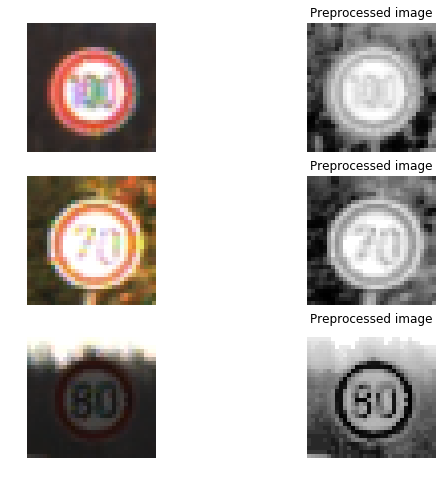

In [5]:
#pre process test with 3 images
plt.figure(figsize = (10,8)) 
gs1 = gridspec.GridSpec(3,2) 
gs1.update(wspace=0.01, hspace=0.19)
plt_count = 0;
for i in range(3):
    index = random.randint(1, len(X_train))
    image = X_train[index]
    ax1 = plt.subplot(gs1[plt_count])
    plt_count += 1
    
    plt.axis('off')
    ax1.set_aspect('equal')
    #ax1[i].axis('off')
    plt.imshow(image)
    #sign_name = signname_df_sorted.loc[y_train[index]]['SignName']
    #plt.title(sign_name)

    pre_image = preprocess_image(image)
    ax2 = plt.subplot(gs1[plt_count])
    plt_count += 1
    
    #ax2[i+1].axis('off')
    plt.imshow(pre_image, cmap='gray')
    plt.title("Preprocessed image")    
    plt.axis('off')
    
plt.show() 


Pre processing data
Before pre process train data shape  (34799, 32, 32, 3)
Before pre process valid data shape  (4410, 32, 32, 3)
Before pre process test data shape  (12630, 32, 32, 3)

After pre process train data shape  (34799, 32, 32, 1)
After pre process valid data shape  (4410, 32, 32, 1)
After pre process test data shape  (12630, 32, 32, 1)

Normalizing data

After normalize train data shape  (34799, 32, 32, 1)
After normalize valid data shape  (4410, 32, 32, 1)
After normalize test data shape  (12630, 32, 32, 1)
Augment is required for Children crossing, no of times 4
Augment is required for Slippery road, no of times 4
Augment is required for Beware of ice/snow, no of times 4
Augment is required for Vehicles over 3.5 metric tons prohibited, no of times 4
Augment is required for Turn left ahead, no of times 4
Augment is required for End of speed limit (80km/h), no of times 4
Augment is required for Go straight or right, no of times 4
Augment is required for Bumpy road, no of ti

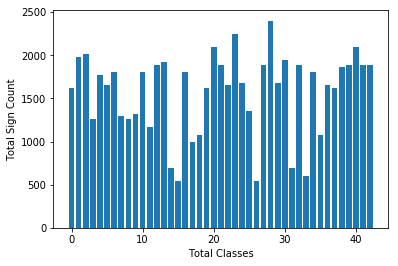

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

print("Pre processing data")
print("Before pre process train data shape ", X_train.shape)
print("Before pre process valid data shape ", X_valid.shape)
print("Before pre process test data shape ", X_test.shape)
print()

X_train_p = np.array([preprocess_image(im) for im in X_train ])
X_valid_p = np.array([preprocess_image(im) for im in X_valid ])
X_test_p =  np.array([preprocess_image(im) for im in X_test ])

X_train_p = X_train_p[..., np.newaxis]
X_valid_p = X_valid_p[..., np.newaxis]
X_test_p = X_test_p[..., np.newaxis]

print("After pre process train data shape ", X_train_p.shape)
print("After pre process valid data shape ", X_valid_p.shape)
print("After pre process test data shape ", X_test_p.shape)
#plot_random_images(5, 5, X_train_p, y_train, False)
print()
print("Normalizing data");
X_train_p = X_train_p - np.mean(X_train_p)
X_valid_p = X_valid_p - np.mean(X_valid_p)
X_test_p = X_test_p - np.mean(X_test_p)
print()
print("After normalize train data shape ", X_train_p.shape)
print("After normalize valid data shape ", X_valid_p.shape)
print("After normalize test data shape ", X_test_p.shape)

#plot_random_images(5, 5, X_train_p, y_train, True)
#print()

X_data, y_data = generate_train_data(X_train_p, y_train)
#X_data, y_data = generate_train_data(X_train, y_train)
#X_data = X_data[..., np.newaxis]
print()
print("Augumented data shape ", X_data.shape)
print()

X_train_aug = np.append(X_train_p, X_data, axis=0)
y_train_aug = np.append(y_train, y_data, axis=0)
print("New training size:", len(X_train_aug), " labels size:", len(y_train_aug) )
print()
y_pos = range(n_classes)
label_list = y_train_aug.tolist()
sign_type = [label_list.count(y) for y in range(n_classes)]

plt.bar(y_pos, sign_type, width=0.8, align='center')
plt.ylabel('Total Sign Count')
plt.xlabel('Total Classes')
plt.show()

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def conv_layer_with_relu(X, filter_size, no_of_channels, no_of_filters, mu, sigma):
    conv_W = tf.Variable(tf.truncated_normal(shape=[filter_size, filter_size, no_of_channels, no_of_filters], mean=mu, stddev=sigma))
    conv_b = tf.Variable(tf.zeros(no_of_filters))
    conv  = tf.nn.conv2d(X, conv_W, strides=[1, 1, 1, 1], padding='VALID') + conv_b
    conv = tf.nn.relu(conv)
    
    return conv

def max_pool(X):
    out = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    return out

def fc_layer_with_relu(fc, in_size, out_size, mu, sigma):
    fc_W = tf.Variable(tf.truncated_normal(shape=(in_size, out_size), mean = mu, stddev = sigma))
    fc_b = tf.Variable(tf.zeros(out_size))
    fc   = tf.matmul(fc, fc_W) + fc_b
    fc  = tf.nn.relu(fc)
    
    return fc

def fully_connected(data, outsize):
    fc = tf.contrib.layers.fully_connected(data, outsize, tf.nn.relu)
    return fc

def LeNet(X):
    mu=0
    sigma=0.1
    
    #Conv Layer 1: Input:32x32x1, filter:5x5, depth:1, no.of.filters:16, Output:28x28x16
    conv1 = conv_layer_with_relu(X, 5, 1, 16, mu, sigma)
    
    #Pooling: Input:28x28x16, Output:14x14x16
    conv1 = max_pool(conv1)
    
    #Conv Layer 2: Input:14x14x16, filter:5x5, depth:16, no.of.filters:32,Output:10x10x32
    conv2 = conv_layer_with_relu(conv1, 5, 16, 32, mu, sigma)
    
    #Pooling: Input:10x10x32, Output:5x5x32
    conv2 = max_pool(conv2)
    #print("Conv6:", conv6)
    
    # Flatten Input:5x5x32, output:800
    fl   = flatten(conv2)
    fl_dropout = tf.nn.dropout(fl, 0.8)
    
    #Fully connected layer 1: Input:400, output:120
    #fc1 = fc_layer_with_relu(fl, 400, 120, mu, sigma)
    #fc1 = fully_connected(fl, 120)
    fc1 = fully_connected(fl_dropout, 128)
    
    #Fully connected layer 2: Input:120, output:84
    #fc2 = fc_layer_with_relu(fc1, 120, 84, mu, sigma)
    fc2 = fully_connected(fc1, 64)
    
    #Fully connected layer 3: Input:84, output:43
    #logits = fc_layer_with_relu(fc2, 84, 43, mu, sigma)
    logits= fully_connected(fc2, 43)
    
    return logits

def ConvNet(X):
    mu=0
    sigma=0.1
    
    #Conv Layer 1: Input:32x32x3, filter:3x3, depth:3, no.of.filters:32, Output:32x32x32
    conv1 = conv_layer_with_relu(X, 3, 1, 32, mu, sigma)
    
    #Conv Layer 2: Input:30x30x3, filter:3x3, depth:32, no.of.filters:32, Output:32x32x32
    conv2 = conv_layer_with_relu(conv1, 3, 32, 32, mu, sigma)
    
    #Conv Layer 3: Input:28x28x3, filter:3x3, depth:32, no.of.filters:32, Output:32x32x32
    conv3 = conv_layer_with_relu(conv2, 3, 32, 32, mu, sigma)
    
    
    #Pooling: Input:32x32x32, Output:16x16x32
    conv3 = max_pool(conv3)
    
    #Conv Layer 4: Input:16x16x32, filter:3x3, depth:32, no.of.filters:64,Output:16x16x64
    conv4 = conv_layer_with_relu(conv3, 3, 32, 64, mu, sigma)
    
    #Conv Layer 5: Input:16x16x32, filter:3x3, depth:64, no.of.filters:64,Output:16x16x64
    conv5 = conv_layer_with_relu(conv4, 3, 64, 64, mu, sigma)
    
    #Conv Layer 6: Input:16x16x32, filter:3x3, depth:64, no.of.filters:64,Output:16x16x64
    conv6 = conv_layer_with_relu(conv5, 3, 64, 64, mu, sigma)
    
    #Pooling: Input:16x16x64, Output:8x8x64
    conv6 = max_pool(conv6)
    #print("Conv6:", conv6)
    
    # Flatten Input:8x8x64, output:1600
    fl   = flatten(conv6)
    
    #Fully connected layer 1: Input:1600, output:120
    fc1 = fc_layer_with_relu(fl, 576, 120, mu, sigma)
    
    #Fully connected layer 2: Input:120, output:84
    fc2 = fc_layer_with_relu(fc1, 120, 84, mu, sigma)
    
    #Fully connected layer 3: Input:84, output:43
    logits = fc_layer_with_relu(fc2, 84, 43, mu, sigma)
    
    return logits
    
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

EPOCHS = 20
BATCH_SIZE = 100
beta = 0.01

#place holder 
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

#Training pipeline
rate = 0.0009

logits = LeNet(x)
#logits = ConvNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
# Loss function using L2 Regularization
#regularizer = tf.nn.l2_loss(x)
#loss_operation = tf.reduce_mean(loss_operation + beta * regularizer)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [9]:
#Model evaluation
inference_operation = tf.argmax(logits, 1)
correct_prediction = tf.equal(inference_operation, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    inference_data = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss, inference = sess.run([accuracy_operation, loss_operation, inference_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        inference_data = np.append(inference_data, inference)
    return total_accuracy / num_examples, total_loss / num_examples, inference_data

In [10]:
start_total = time.time();
start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_aug)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_aug[offset:end], y_train_aug[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
            
        validation_accuracy, validation_loss, inference_data = evaluate(X_valid_p, y_valid)
        #if i%10 == 0:
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        end = time.time();
        print("Total EPOCH time = {}".format(end -start))
        start = time.time()
        print()
    
    end = time.time()
    print("Totla time ={}".format(end-start_total))
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.690
Total EPOCH time = 45.704861879348755

EPOCH 2 ...
Validation Accuracy = 0.818
Total EPOCH time = 43.95777678489685

EPOCH 3 ...
Validation Accuracy = 0.866
Total EPOCH time = 39.88943386077881

EPOCH 4 ...
Validation Accuracy = 0.874
Total EPOCH time = 40.93063402175903

EPOCH 5 ...
Validation Accuracy = 0.895
Total EPOCH time = 40.228939056396484

EPOCH 6 ...
Validation Accuracy = 0.908
Total EPOCH time = 39.80581498146057

EPOCH 7 ...
Validation Accuracy = 0.914
Total EPOCH time = 39.45374298095703

EPOCH 8 ...
Validation Accuracy = 0.921
Total EPOCH time = 39.81725311279297

EPOCH 9 ...
Validation Accuracy = 0.923
Total EPOCH time = 40.35807514190674

EPOCH 10 ...
Validation Accuracy = 0.917
Total EPOCH time = 40.13377809524536

EPOCH 11 ...
Validation Accuracy = 0.928
Total EPOCH time = 43.31602501869202

EPOCH 12 ...
Validation Accuracy = 0.930
Total EPOCH time = 41.615262031555176

EPOCH 13 ...
Validation Accuracy = 0.912
Tota

Test Accuracy = 0.912


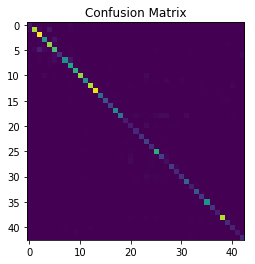

In [13]:
with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        test_accuracy, test_loss, test_inference_data = evaluate(X_test_p, y_test)
        
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        plt.title('Confusion Matrix')
        plt.imshow(confusion_matrix(y_true = y_test,y_pred = test_inference_data))
        plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Original new images with resize


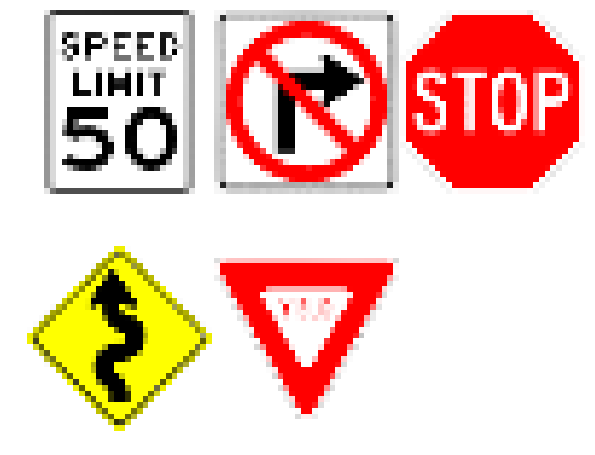


After preprocessed 


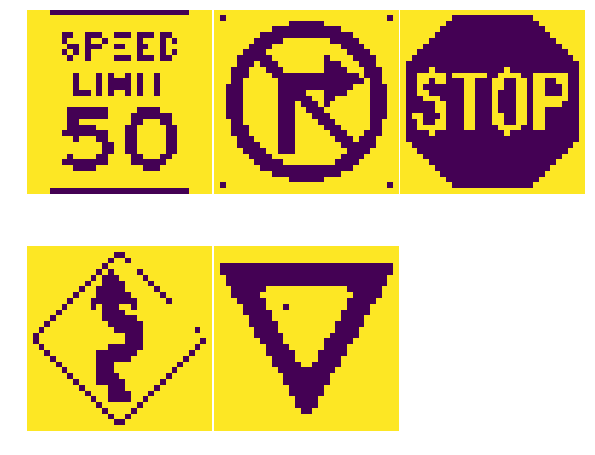

In [51]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

def read_newimage_file(name):
    image = mpimg.imread(name)
    #image = cv2.imread(name, cv2.IMREAD_UNCHANGED)
    #image = cv2.resize(image,(32,32))
    image = cv2.resize(image,(32,32))
    
    return image

def preprocess_newimage(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #retval, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img = cv2.convertScaleAbs(img)
    img = cv2.equalizeHist(img)
    
    return img;

def plot_newimages(images):
    plt.figure(figsize = (10,8))
    gs1 = gridspec.GridSpec(2,3)
    gs1.update(wspace=0.01, hspace=0.19)
    for index in range(len(images)):
        image = images[index]
        ax1 = plt.subplot(gs1[index])
        plt.axis('off')
        #ax1.set_aspect('equal')
        plt.imshow(image)
    plt.show() 

n_image_names = [name for name in os.listdir('./new_signs/') if not name.startswith('.')]
#print(n_image_names)
n_image_data = [read_newimage_file('./new_signs/' + name) for name in os.listdir('./new_signs/') if not name.startswith('.')]
NP_img_data = np.array(n_image_data, dtype=np.float32)
print("Original new images with resize")
plot_newimages(NP_img_data)
print()
NP_image_p = np.array([preprocess_newimage(img) for img in NP_img_data])
print("After preprocessed ")
plot_newimages(NP_image_p)
NP_image_p = NP_image_p[..., np.newaxis]

### Predict the Sign Type for Each Image

In [24]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
feed_dict_new = {x:NP_image_p, keep_prob: 1}
top5_k = tf.nn.top_k(logits, 5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    inference_output = sess.run([inference_operation, top5_k], feed_dict=feed_dict_new)
    #logits_pred = sess.run([logits, top5_k], feed_dict=feed_dict_new)
    print(inference_output)


[array([17, 20,  0, 40, 13]), TopKV2(values=array([[  32.95628357,   17.21338081,   10.3754921 ,   10.0947094 ,
           8.26375294],
       [   9.73399544,    9.59369183,    9.1671505 ,    4.96352148,
           4.37721586],
       [  16.65415955,   15.84739494,   15.45999622,   14.27790833,
          13.88187599],
       [  16.96342659,    7.99330521,    6.16056204,    4.9902072 ,
           4.92687559],
       [ 164.1230011 ,   46.94557953,   26.51422119,   25.13241196,
          23.80057335]], dtype=float32), indices=array([[17, 40, 16, 33, 34],
       [20,  6, 40, 10, 12],
       [ 0, 18,  3, 20,  8],
       [40, 20, 29, 11, 28],
       [13, 32,  3,  5,  2]], dtype=int32))]


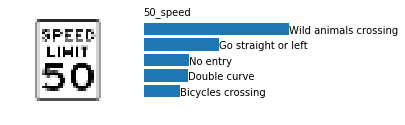

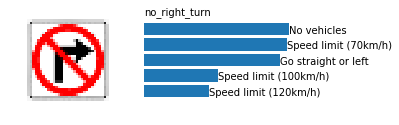

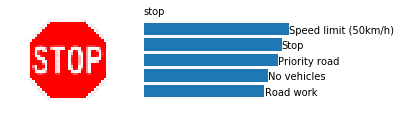

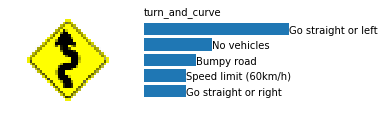

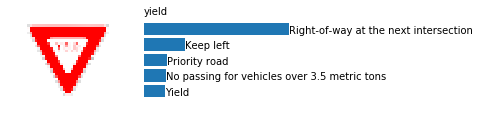

In [47]:
for i in range(5):
    plt.figure(figsize = (5,1.5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
    plt.subplot(gs[0])
    plt.imshow(NP_img_data[i])
    plt.axis('off')
    plt.subplot(gs[1])
    plt.barh(6-np.arange(5),inference_output[1][0][i], align='center')
    for i_label in range(5):
        plt.text(inference_output[1][0][i][i_label]+.02,6-i_label-.25,
            signname_df_sorted['SignName'][inference_output[1][1][i][i_label]])
    plt.axis('off');
    plt.text(0,6.95,n_image_names[i].split('.')[0]);
    plt.show();

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [35]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[1]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [46]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print(NP_image_p[0])
    #outputFeatureMap(NP_image_p[0], logits)

[[[255]
  [255]
  [255]
  ..., 
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ..., 
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ..., 
  [255]
  [255]
  [255]]

 ..., 
 [[255]
  [255]
  [255]
  ..., 
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ..., 
  [255]
  [255]
  [255]]

 [[255]
  [255]
  [255]
  ..., 
  [255]
  [255]
  [255]]]
